# UNIT 08 인구 구조를 다양한 형태로 시각화하기

Unit 7에서 살펴보았던 인구 데이터를 다양한 형태로 시각화해보자.

`input()`을 사용해서 읍면동 이름을 넣으면 그래프가 출력되는 기능을 구현해보자

In [1]:
import matplotlib.font_manager as fm
import matplotlib

path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 청담동


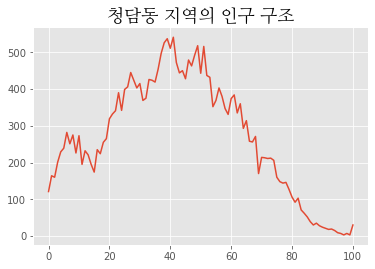

In [2]:
import csv
f = open('202101_age.csv', encoding='cp949')
data = csv.reader(f)

result = []
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ') # 인구 구조가 궁금한 지역의 이름을 input() 함수로 입력받는다

for row in data :
    if name in row[0] : # 입력받은 내용이 포함된 값을 찾는다
        for i in row[3:] :
            result.append(int(i))
            
            
import matplotlib.pyplot as plt
plt.style.use('ggplot') # 그래프에 스타일을 적용한다
# plt.rc('font', fontproperties=fontprop)
plt.title(name +' 지역의 인구 구조', fontproperties=fontprop) # title() 함수를 사용해 제목을 넣는다 
plt.plot(result)
plt.show()

## 1. 막대 그래프 그리기
---
이렇게 인구 구조를 꺾은 선 그래프로 표현하니 해당지역에 어떤 연령의 사람들이 많고 적은지 한눈에 들어온다. 만약 다른 그래프로 시각화 한다면 어떨까? `bar()` 함수를 사용해서 막대 그래프를 그려보자

### bar() 함수
---
`bar()` 함수는 막대그래프를 표현하는 명령어이다.

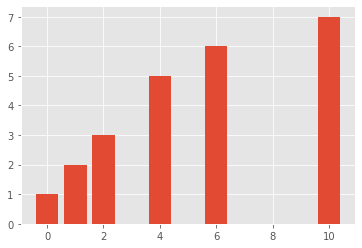

In [3]:
import matplotlib.pyplot as plt
plt.bar([0,1,2,4,6,10], [1,2,3,5,6,7])
plt.show()

`bar()` 함수는 두 가지 값이 입력된다.
* 막대를 표시할 위치
* 막대의 높이

```python
bar(막대를 표시할 위치, 막대의 높이)
```

위 코드처럼 bar([0,1,2,4,6,10], [1,2,3,5,6,7])를 실행할 경우, 0에 해당하는 위치의 막대 높이는 1이고, 10에 해당하는 위치의 막대 높이는 7인 그래프가 그려진다.

막대그래프의 위치를 오름차순으로 표현하는 경우가 많으므로, 다음과 같이 `range()` 함수를 사용하여 막대그래프의 위치를 표현할 수 있다.

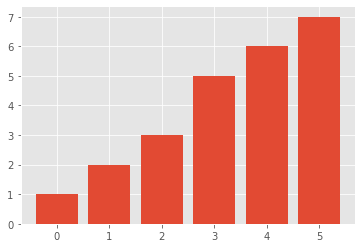

In [4]:
import matplotlib.pyplot as plt
plt.bar(range(6), [1,2,3,5,6,7])
plt.show()

이제 우리 동네의 인구 구조를 막대 그래프로 표현해보자. 0-100세 이상까지 101개의 구간이 있기 때문에 막대의 위치를 `range(101)`로 지정해야 한다.

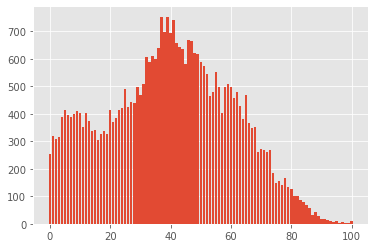

In [5]:
f = open('202101_age.csv', encoding='cp949')
data = csv.reader(f)

result = []

for row in data :
    if '신도림' in row[0] :
        for i in row[3:] :
            result.append(int(i))
            

plt.bar(range(101), result)
plt.show()

### barh() 함수
---
막대그래프를 수직이 아닌 수평 방향으로 그릴 수도 있다. `barh()` 함수를 사용하면 수평 막대 그래프로 표현된다.

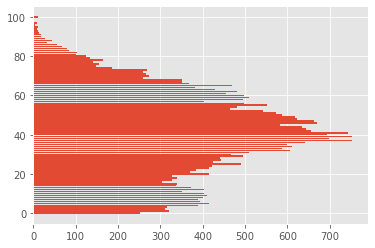

In [6]:
plt.barh(range(101), result)
plt.show()

## 2. 항아리 모양 그래프 그리기
---
우선, 성별 데이터를 가지고 와야 한다.

그리고 남성 데이터와 여성 데이터를 각각 따로 저장해야 한다. 남성데이터는 왼쪽에, 여성 데이터는 오른쪽에 있으므로, 앞에서 3번쨰에 있는 데이터는 남성 0세 인구수이고, 뒤에서 첫 번째 데이터는 여성의 100세 이상 인구수이다.

In [7]:
import csv

f = open('202101_gender.csv', encoding='cp949')
data = csv.reader(f)
 
for row in data :
    print(row)

['행정구역', '2021년01월_남_총인구수', '2021년01월_남_연령구간인구수', '2021년01월_남_0세', '2021년01월_남_1세', '2021년01월_남_2세', '2021년01월_남_3세', '2021년01월_남_4세', '2021년01월_남_5세', '2021년01월_남_6세', '2021년01월_남_7세', '2021년01월_남_8세', '2021년01월_남_9세', '2021년01월_남_10세', '2021년01월_남_11세', '2021년01월_남_12세', '2021년01월_남_13세', '2021년01월_남_14세', '2021년01월_남_15세', '2021년01월_남_16세', '2021년01월_남_17세', '2021년01월_남_18세', '2021년01월_남_19세', '2021년01월_남_20세', '2021년01월_남_21세', '2021년01월_남_22세', '2021년01월_남_23세', '2021년01월_남_24세', '2021년01월_남_25세', '2021년01월_남_26세', '2021년01월_남_27세', '2021년01월_남_28세', '2021년01월_남_29세', '2021년01월_남_30세', '2021년01월_남_31세', '2021년01월_남_32세', '2021년01월_남_33세', '2021년01월_남_34세', '2021년01월_남_35세', '2021년01월_남_36세', '2021년01월_남_37세', '2021년01월_남_38세', '2021년01월_남_39세', '2021년01월_남_40세', '2021년01월_남_41세', '2021년01월_남_42세', '2021년01월_남_43세', '2021년01월_남_44세', '2021년01월_남_45세', '2021년01월_남_46세', '2021년01월_남_47세', '2021년01월_남_48세', '2021년01월_남_49세', '2021년01월_남_50세', '2021년01월_남_51세', '2021년01월_남_52세', '2021년

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



남성 데이터는 맨 앞에서부터 리스트 `m`에 차례대로 저장하면 된다. 여성데이터는 인덱스 값이 -1인 100세 이상 인구수부터 리스트 `f`에 저장한 후, 저장된 여성 데이터를 다시 역순으로 뒤집으면 된다.

In [8]:
f = open('202101_gender.csv', encoding='cp949')
data = csv.reader(f)

m = []
f = []

for row in data :
    if '신도림' in row[0] :
        for i in range(0,101) :
            m.append(int(row[i+3]))
            f.append(int(row[-(i+1)]))
            
f.reverse() # reverse() 함수는 리스트의 값을 역순으로 재배열하는 함수이다.

In [9]:
f = open('202101_gender.csv', encoding='cp949')
data = csv.reader(f)

m = []
f = []

for row in data :
    if'신도림'in row[0] :
        for i in row[3:104] : 
            m.append(-int(i)) # 남성 데이터를 리스트 m에 저장, 마이너스 부호를 넣어서 음수로 변경
        for i in row[106:] :
            
            f.append(int(i)) # 여성 데이터를 리스트 f에 저장

### 데이터 시각화 하기
---
`m`과 `f`데이터를 각각 수평 막대 그래프로 표현하자.

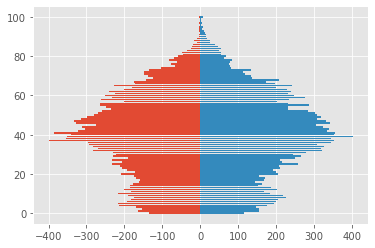

In [10]:
plt.barh(range(101), m)
plt.barh(range(101), f)
plt.show()

그리고, 제목과 범례를 넣자.

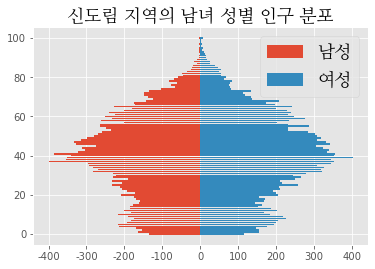

In [11]:
# plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨지지 않게 하기
plt.title('신도림 지역의 남녀 성별 인구 분포', fontproperties=fontprop)
plt.barh(range(101), m, label = '남성')
plt.barh(range(101), f, label = '여성')
plt.legend(prop=fontprop)
plt.show()

최종적으로 원하는 지역의 이름을 넣어 실행할 수 있도록 하자.

찾고 싶은 지역의 이름을 알려주세요 : 청담동


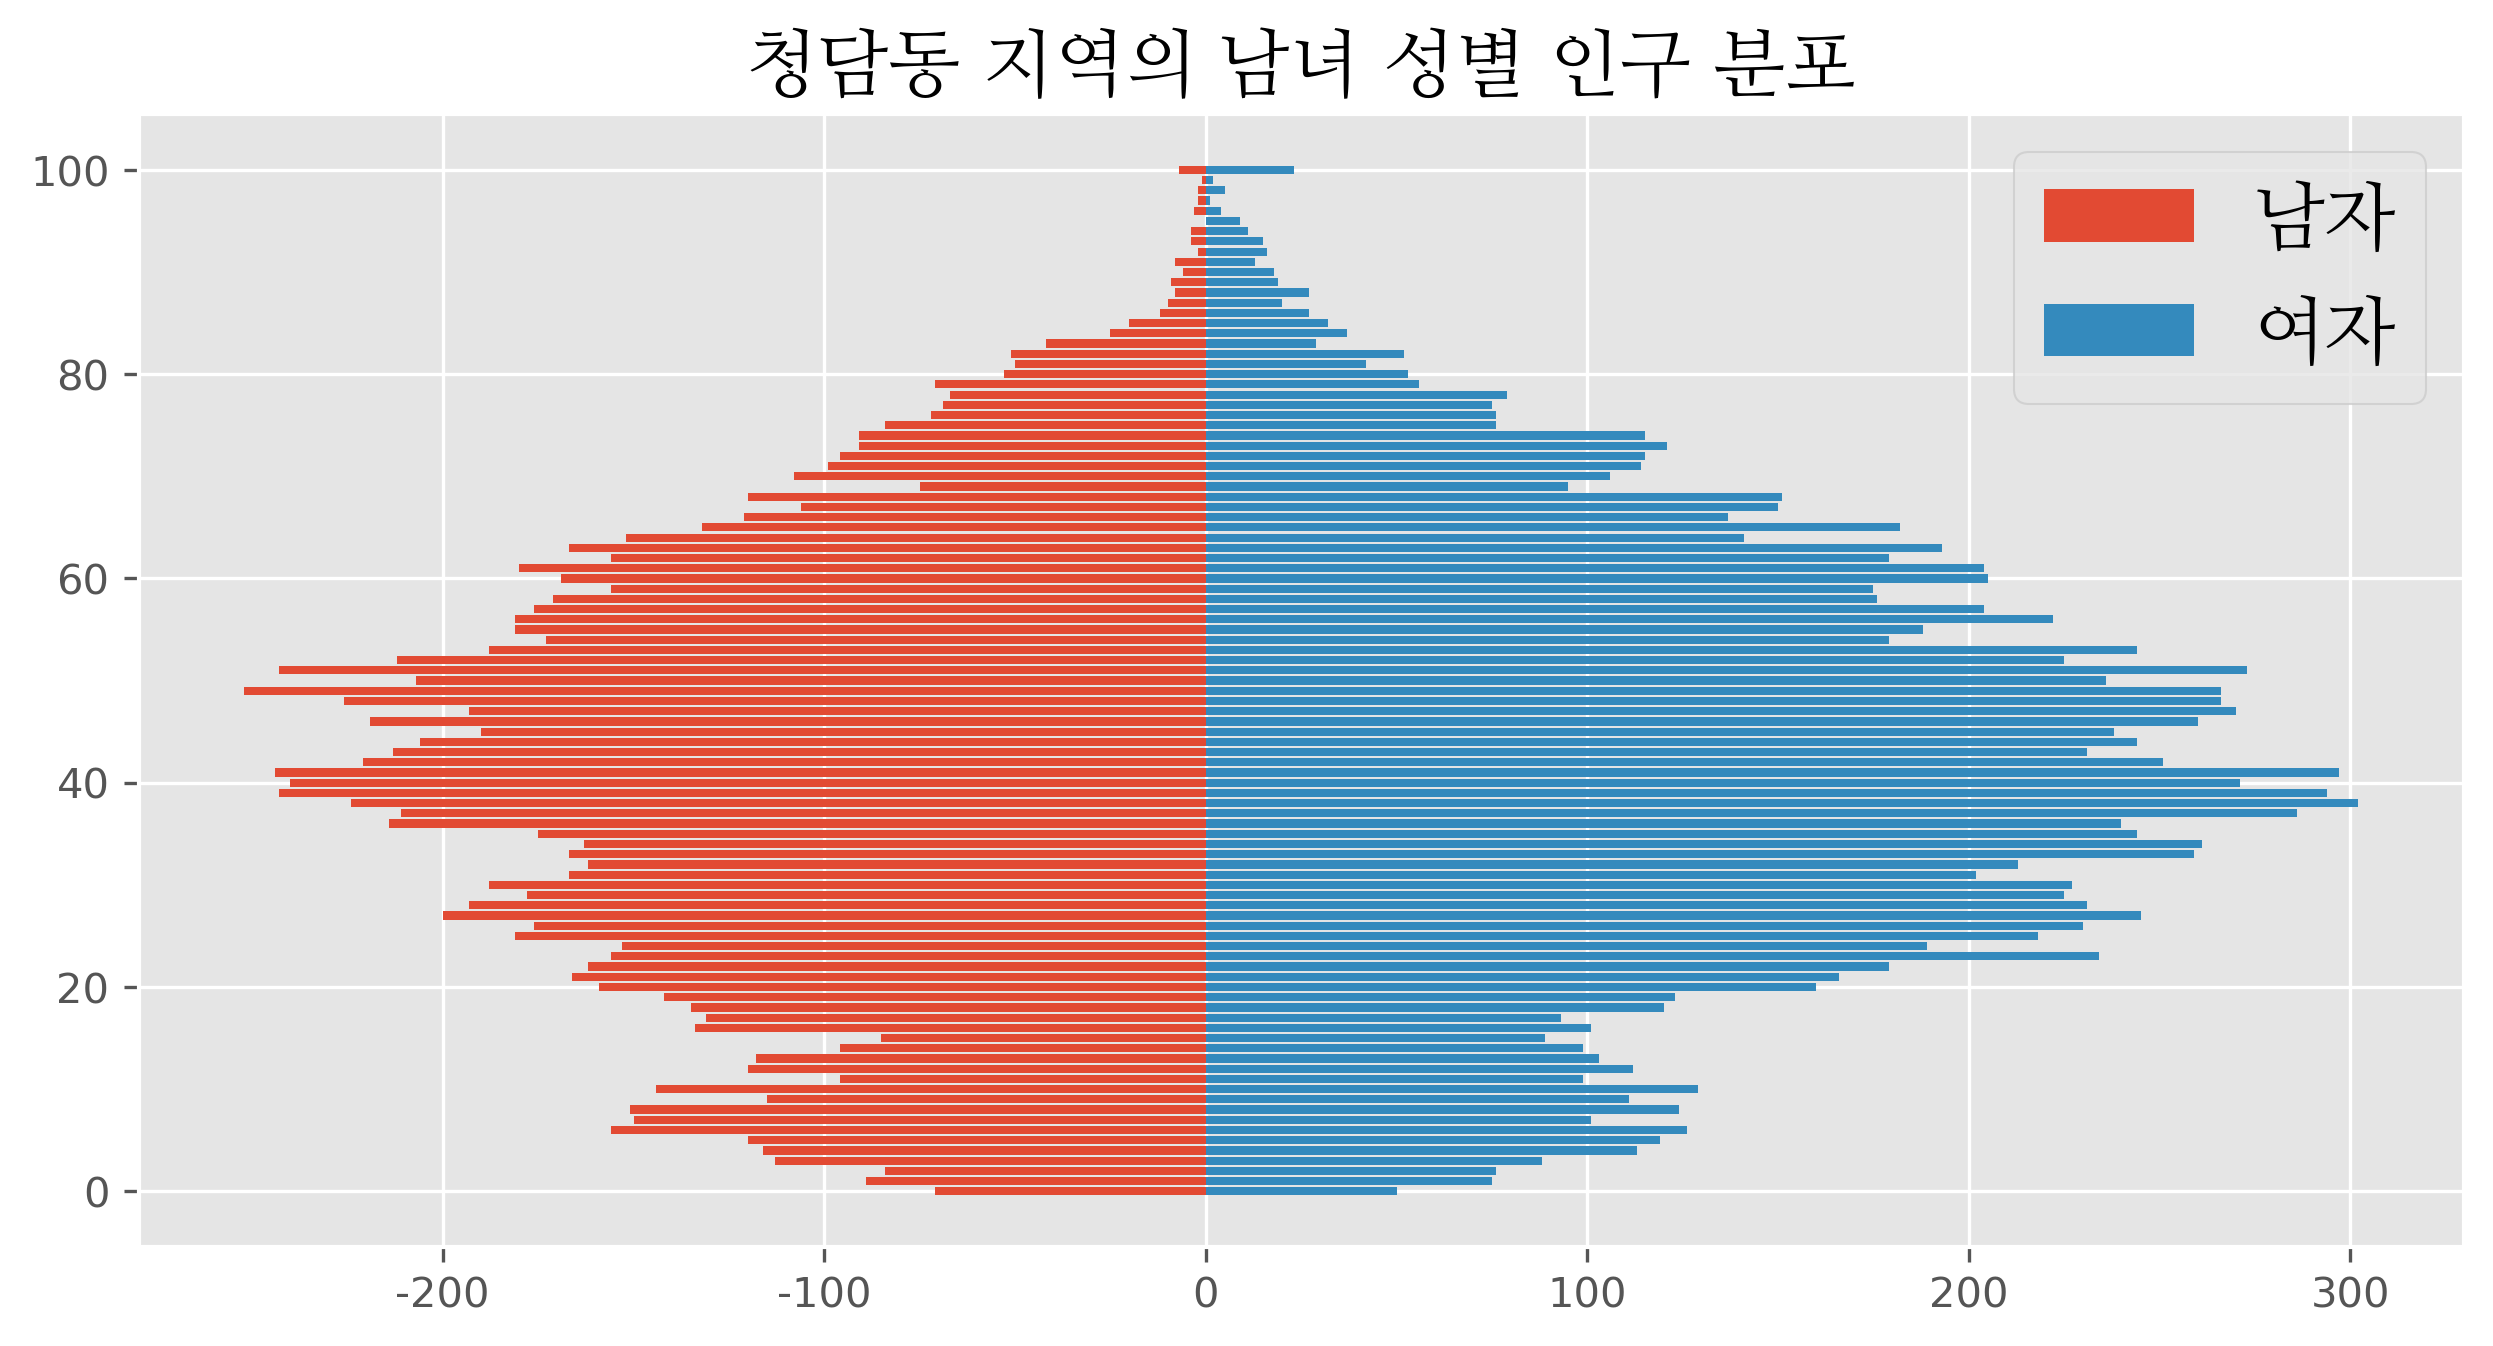

In [13]:
f = open('202101_gender.csv', encoding='cp949')
data = csv.reader(f)
 
m = []
f = []
 
name = input('찾고 싶은 지역의 이름을 알려주세요 : ')
for row in data :
    if name in row[0] :
        for i in row[3:104] :
            m.append(-int(i))
        for i in row[106:] :
            f.append(int(i))

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize = (10,5), dpi=300)
plt.rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False
plt.title(name + ' 지역의 남녀 성별 인구 분포', fontproperties=fontprop)
plt.barh(range(101), m, label = '남자')
plt.barh(range(101), f, label = '여자')
plt.legend(prop=fontprop)
plt.show()